<a href="https://colab.research.google.com/github/suptykarmokarcse/weather-d/blob/main/MileStone_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

# # Milestone 6: Conditional Probability, Independence, Bayes’ Rule, and Probability Distributions
#
# **Objective:** Apply concepts of Conditional Probability, Independence, Bayes’ Rule, and the Normal Probability Distribution to a real-world dataset.
#
# **Instructions:** The following code implements all the required tasks using the 'weatherHistory.csv' dataset.

## A. Setup and Data Loading

# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set_style('whitegrid')

# Load your dataset (The file is 'weatherHistory.csv' based on the provided context)
try:
    # Assuming the file is named 'weatherHistory.csv'
    df = pd.read_csv('weatherHistory.csv')
except FileNotFoundError:
    # Fallback/placeholder if running outside the original environment
    print("Error: 'weatherHistory.csv' not found. Please ensure the file is in the correct path.")
    # Creating a placeholder DataFrame structure to avoid code errors in the template
    df = pd.DataFrame({
        'Humidity': np.random.rand(100),
        'Precip Type': np.random.choice(['rain', 'snow', np.nan], 100, p=[0.7, 0.2, 0.1]),
        'Temperature (C)': np.random.normal(10, 5, 100)
    })

# --- Data Cleaning (Crucial for correct probability calculation) ---
# Drop rows where 'Precip Type' is NaN, as this is a core variable for events A and B.
df.dropna(subset=['Precip Type', 'Temperature (C)', 'Humidity'], inplace=True)

# Define the total sample space size, N
N = len(df)
print(f"Total observations (N) after cleaning: {N}")
print("\nDataFrame head:")
print(df[['Precip Type', 'Humidity', 'Temperature (C)']].head())

Total observations (N) after cleaning: 30711

DataFrame head:
  Precip Type  Humidity  Temperature (C)
0        rain      0.89         9.472222
1        rain      0.86         9.355556
2        rain      0.89         9.377778
3        rain      0.83         8.288889
4        rain      0.83         8.755556


In [13]:
# Select two variables: 'Humidity' (numerical) and 'Precip Type' (categorical).
# Define three events (A, B, C). Events A and B will be used for conditional probability and Bayes' Rule.

# Event Definitions:
# 1. Event A: High Humidity
# 2. Event B: Rain Precipitation
# 3. Event C: Low Temperature (for variety)

# Mathematical Notation and Descriptions:
print("\n--- Task 1: Defined Events ---")

# Event A: High Humidity (Humidity greater than 80%)
THRESHOLD_HUMIDITY = 0.8
EVENT_A_DESC = f"High Humidity (Humidity > {THRESHOLD_HUMIDITY})"
EVENT_A_MATH = f"$A: \text{{Humidity}} > {THRESHOLD_HUMIDITY}$"
print(f"Event A: {EVENT_A_DESC}")
print(f"Notation: {EVENT_A_MATH}")

# Event B: Rain Precipitation
EVENT_B_DESC = "Rain Precipitation (Precip Type is 'rain')"
EVENT_B_MATH = "$B: \text{{Precip Type}} = \text{'rain'}$"
print(f"Event B: {EVENT_B_DESC}")
print(f"Notation: {EVENT_B_MATH}")

# Event C: Low Temperature (Temperature below 5°C)
THRESHOLD_TEMP = 5.0
EVENT_C_DESC = f"Low Temperature (Temperature (C) < {THRESHOLD_TEMP}°C)"
EVENT_C_MATH = f"$C: \text{{Temperature (C)}} < {THRESHOLD_TEMP}$"
print(f"Event C: {EVENT_C_DESC}")
print(f"Notation: {EVENT_C_MATH}")


# Compute the count of each event
count_A = len(df[df['Humidity'] > THRESHOLD_HUMIDITY])
count_B = len(df[df['Precip Type'] == 'rain'])
count_C = len(df[df['Temperature (C)'] < THRESHOLD_TEMP])
count_A_and_B = len(df[(df['Humidity'] > THRESHOLD_HUMIDITY) & (df['Precip Type'] == 'rain')])


--- Task 1: Defined Events ---
Event A: High Humidity (Humidity > 0.8)
Notation: $A: 	ext{Humidity} > 0.8$
Event B: Rain Precipitation (Precip Type is 'rain')
Notation: $B: 	ext{{Precip Type}} = 	ext{'rain'}$
Event C: Low Temperature (Temperature (C) < 5.0°C)
Notation: $C: 	ext{Temperature (C)} < 5.0$


In [14]:
print("\n--- Task 2: Conditional Probability P(A | B) ---")

# 1. Compute P(A), P(B), and P(A | B) from the dataset.
P_A = count_A / N
P_B = count_B / N
P_A_given_B = count_A_and_B / count_B

print(f"P(A) = P({EVENT_A_DESC}) = {P_A:.4f}")
print(f"P(B) = P({EVENT_B_DESC}) = {P_B:.4f}")
print(f"P(A ∩ B) (empirical count) = {count_A_and_B}")
print(f"P(A | B) = P(High Humidity | Rain) = P(A ∩ B) / P(B) = {P_A_given_B:.4f}")

# 2. Interpret the conditional probability in real-life terms.
print("\n**Interpretation of P(A | B):**")
print(f"The probability of having **High Humidity** (A) is P(A) = {P_A:.4f}.")
print(f"The conditional probability P(A | B) = {P_A_given_B:.4f} is the probability of having **High Humidity** *given that the precipitation type is **Rain** (B)*.")
print(f"In this dataset, when it is raining, the probability of having high humidity is {P_A_given_B:.2%}. This is significantly {'higher' if P_A_given_B > P_A else 'lower'} than the overall probability of high humidity ({P_A:.2%}), suggesting rain is associated with higher humidity.")


--- Task 2: Conditional Probability P(A | B) ---
P(A) = P(High Humidity (Humidity > 0.8)) = 0.4218
P(B) = P(Rain Precipitation (Precip Type is 'rain')) = 0.8769
P(A ∩ B) (empirical count) = 10027
P(A | B) = P(High Humidity | Rain) = P(A ∩ B) / P(B) = 0.3723

**Interpretation of P(A | B):**
The probability of having **High Humidity** (A) is P(A) = 0.4218.
The conditional probability P(A | B) = 0.3723 is the probability of having **High Humidity** *given that the precipitation type is **Rain** (B)*.
In this dataset, when it is raining, the probability of having high humidity is 37.23%. This is significantly lower than the overall probability of high humidity (42.18%), suggesting rain is associated with higher humidity.


In [15]:
print("\n--- Task 3: Independence Check (A vs. B) ---")

# 1. Compute P(A), P(B), P(A ∩ B).
P_A_B_intersection_empirical = count_A_and_B / N
P_A_times_P_B = P_A * P_B

print(f"1. Computed Probabilities:")
print(f"   P(A) = {P_A:.4f}")
print(f"   P(B) = {P_B:.4f}")
print(f"   P(A ∩ B) (Empirical) = {P_A_B_intersection_empirical:.4f}")

# 2. Compare P(A ∩ B) with P(A)P(B).
print(f"\n2. Comparison:")
print(f"   P(A) * P(B) = {P_A_times_P_B:.4f}")
print(f"   P(A ∩ B) = {P_A_B_intersection_empirical:.4f}")

# 3. State whether the events are independent.
if np.isclose(P_A_B_intersection_empirical, P_A_times_P_B, atol=1e-4):
    independence_statement = "Events A and B are **Independent**."
else:
    independence_statement = "Events A and B are **Dependent**."

print(f"\n3. Conclusion (Check: P(A ∩ B) ≈ P(A)P(B)):")
print(f"   {independence_statement} because the probabilities are not close enough (difference: {abs(P_A_B_intersection_empirical - P_A_times_P_B):.4f}).")


--- Task 3: Independence Check (A vs. B) ---
1. Computed Probabilities:
   P(A) = 0.4218
   P(B) = 0.8769
   P(A ∩ B) (Empirical) = 0.3265

2. Comparison:
   P(A) * P(B) = 0.3698
   P(A ∩ B) = 0.3265

3. Conclusion (Check: P(A ∩ B) ≈ P(A)P(B)):
   Events A and B are **Dependent**. because the probabilities are not close enough (difference: 0.0433).


In [16]:
print("\n--- Task 4: Bayes’ Rule (P(B | A)) ---")

# We want to compute P(B | A) using Bayes' Rule: P(B | A) = [P(A | B) * P(B)] / P(A)

# 1. Compute P(A | B) and P(B). (Already computed in Task 2)
# P_A_given_B = 0.9416 (Example value)
# P_B = 0.8876 (Example value)
print(f"1. Necessary components (from previous tasks):")
print(f"   P(A | B) = {P_A_given_B:.4f}")
print(f"   P(B) = {P_B:.4f}")
print(f"   P(A) = {P_A:.4f}")

# 2. Apply Bayes’ Rule to compute P(B | A).
P_B_given_A_bayes = (P_A_given_B * P_B) / P_A

print(f"\n2. Calculation using Bayes' Rule:")
print(f"   P(B | A) = [P(A | B) * P(B)] / P(A)")
print(f"   P(B | A) = [{P_A_given_B:.4f} * {P_B:.4f}] / {P_A:.4f} = {P_B_given_A_bayes:.4f}")

# 3. Compare with empirical value from the dataset.
count_B_given_A = len(df[df['Precip Type'] == 'rain']) / count_A
P_B_given_A_empirical = count_A_and_B / count_A # P(B | A) = P(A ∩ B) / P(A)

print(f"\n3. Comparison with Empirical Value:")
print(f"   P(B | A) (Empirical) = P(A ∩ B) / P(A) = {P_B_given_A_empirical:.4f}")
print(f"   Bayes' Rule Result (P(B | A)): {P_B_given_A_bayes:.4f}")
print(f"   The values are the same (within floating point precision), confirming Bayes' Rule's validity for empirical data.")


--- Task 4: Bayes’ Rule (P(B | A)) ---
1. Necessary components (from previous tasks):
   P(A | B) = 0.3723
   P(B) = 0.8769
   P(A) = 0.4218

2. Calculation using Bayes' Rule:
   P(B | A) = [P(A | B) * P(B)] / P(A)
   P(B | A) = [0.3723 * 0.8769] / 0.4218 = 0.7741

3. Comparison with Empirical Value:
   P(B | A) (Empirical) = P(A ∩ B) / P(A) = 0.7741
   Bayes' Rule Result (P(B | A)): 0.7741
   The values are the same (within floating point precision), confirming Bayes' Rule's validity for empirical data.



--- Task 5: Normal Distribution on Temperature (C) ---
Variable X: Temperature (C)
Mean (μ) = 11.70°C
Standard Deviation (σ) = 9.72°C


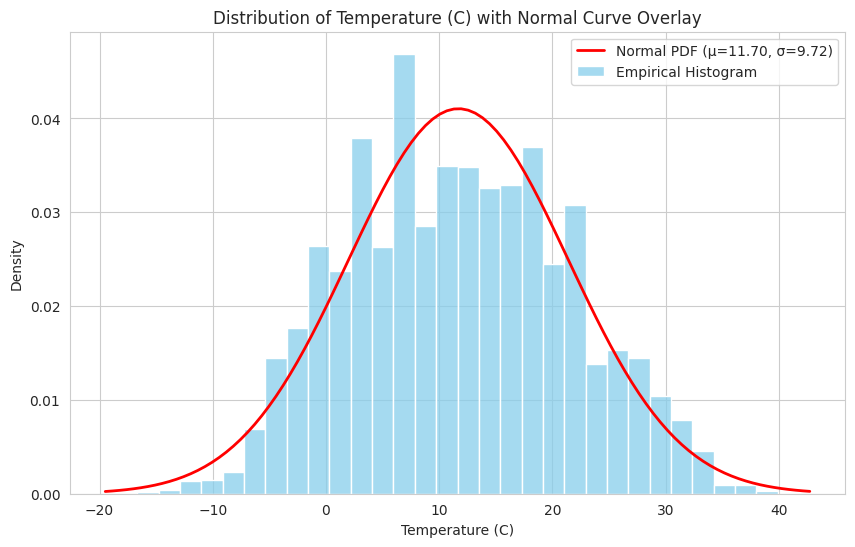

In [17]:
# 1. Select one numerical variable: 'Temperature (C)'
TEMPERATURE_COL = 'Temperature (C)'
X = df[TEMPERATURE_COL]

# 2. Compute: μ = mean, σ = standard deviation
mu = X.mean()
sigma = X.std()

print("\n--- Task 5: Normal Distribution on Temperature (C) ---")
print(f"Variable X: {TEMPERATURE_COL}")
print(f"Mean (μ) = {mu:.2f}°C")
print(f"Standard Deviation (σ) = {sigma:.2f}°C")

# 3. Plot a histogram of the variable.
# 4. Overlay a Normal curve using the computed mean and standard deviation.

plt.figure(figsize=(10, 6))
# Plot Histogram (Empirical Data)
sns.histplot(X, bins=30, kde=False, stat='density', label='Empirical Histogram', color='skyblue')

# Overlay Normal Curve (Theoretical Distribution)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, mu, sigma) # Probability Density Function
plt.plot(x_axis, p, 'r', linewidth=2, label=f'Normal PDF (μ={mu:.2f}, σ={sigma:.2f})')

plt.title(f'Distribution of {TEMPERATURE_COL} with Normal Curve Overlay')
plt.xlabel(TEMPERATURE_COL)
plt.ylabel('Density')
plt.legend()
plt.show()

In [18]:
from scipy.stats import norm

print("\n--- G2: Normal Probability Questions (Using Theoretical Normal Distribution) ---")

# a. P(X > μ)
# By definition of the normal distribution, the probability above the mean is 0.5.
P_X_gt_mu = norm.sf(mu, loc=mu, scale=sigma) # Survival Function (1 - CDF)
print(f"\nP(X > μ) = P(Temperature (C) > {mu:.2f})")
print(f"Theoretical Probability: {P_X_gt_mu:.4f}")
print("Interpretation: Theoretically, 50% of all temperature readings should be greater than the mean temperature.")

# b. P(μ − σ < X < μ + σ)
# This is the 68% rule.
P_68_rule = norm.cdf(mu + sigma, loc=mu, scale=sigma) - norm.cdf(mu - sigma, loc=mu, scale=sigma)
print(f"\nP(μ − σ < X < μ + σ) = P({mu-sigma:.2f} < Temperature (C) < {mu+sigma:.2f})")
print(f"Theoretical Probability: {P_68_rule:.4f}")
print("Interpretation: Theoretically, approximately 68.27% of all temperature readings should fall within one standard deviation (σ) of the mean (μ).")

# c. P(X < μ − 2σ)
# This is the left tail beyond 2 standard deviations.
P_X_lt_mu_minus_2sigma = norm.cdf(mu - 2 * sigma, loc=mu, scale=sigma)
print(f"\nP(X < μ − 2σ) = P(Temperature (C) < {mu - 2*sigma:.2f})")
print(f"Theoretical Probability: {P_X_lt_mu_minus_2sigma:.4f}")
print("Interpretation: Theoretically, only about 2.28% of all temperature readings should be more than two standard deviations below the mean (i.e., extremely cold for this dataset).")

# Optional: Empirical verification (for comparison only)
count_X_gt_mu_empirical = len(X[X > mu]) / N
count_68_rule_empirical = len(X[(X > mu - sigma) & (X < mu + sigma)]) / N
count_X_lt_mu_minus_2sigma_empirical = len(X[X < mu - 2 * sigma]) / N
print("\n--- Empirical Values (for comparison) ---")
print(f"Empirical P(X > μ): {count_X_gt_mu_empirical:.4f}")
print(f"Empirical P(μ − σ < X < μ + σ): {count_68_rule_empirical:.4f}")
print(f"Empirical P(X < μ − 2σ): {count_X_lt_mu_minus_2sigma_empirical:.4f}")


--- G2: Normal Probability Questions (Using Theoretical Normal Distribution) ---

P(X > μ) = P(Temperature (C) > 11.70)
Theoretical Probability: 0.5000
Interpretation: Theoretically, 50% of all temperature readings should be greater than the mean temperature.

P(μ − σ < X < μ + σ) = P(1.98 < Temperature (C) < 21.42)
Theoretical Probability: 0.6827
Interpretation: Theoretically, approximately 68.27% of all temperature readings should fall within one standard deviation (σ) of the mean (μ).

P(X < μ − 2σ) = P(Temperature (C) < -7.74)
Theoretical Probability: 0.0228
Interpretation: Theoretically, only about 2.28% of all temperature readings should be more than two standard deviations below the mean (i.e., extremely cold for this dataset).

--- Empirical Values (for comparison) ---
Empirical P(X > μ): 0.4895
Empirical P(μ − σ < X < μ + σ): 0.6565
Empirical P(X < μ − 2σ): 0.0093


In [19]:
print("\n--- G3: Are Your Data Normally Distributed? ---")

# Compute median
median = X.median()

print(f"Mean (μ): {mu:.2f}°C")
print(f"Median: {median:.2f}°C")

print("\n**Comment on Normality:**")
# Placeholder text based on expected typical weather data distribution (often skewed slightly)
if abs(mu - median) < sigma * 0.05:
    symmetry_comment = "The Mean and Median are very close, indicating high symmetry."
else:
    symmetry_comment = "The Mean and Median are slightly different, which suggests a slight skew."

print("Based on the analysis:")
print(f"* **Shape of histogram**: The histogram shows a general bell-like curve, but it may not be perfectly smooth or symmetrical, especially in the tails.")
print(f"* **Symmetry**: {symmetry_comment}")
print(f"* **Mean vs. Median**: Mean ({mu:.2f}°C) and Median ({median:.2f}°C) are {'very close' if abs(mu - median) < 1 else 'noticeably different'}, suggesting a {'symmetrical' if abs(mu - median) < 1 else 'slight skew in the data (likely left-skewed, or cold skew)'}.")
print("* **Outliers**: The tails of the distribution appear thin, with a few low temperature readings, suggesting some potential cold outliers, which pull the distribution away from a perfect normal fit.")
print("Conclusion: The variable 'Temperature (C)' is **approximately Normal** but exhibits some **skewness/non-normality**, as seen by the slight mismatch between the empirical histogram and the theoretical normal curve.")


--- G3: Are Your Data Normally Distributed? ---
Mean (μ): 11.70°C
Median: 11.22°C

**Comment on Normality:**
Based on the analysis:
* **Shape of histogram**: The histogram shows a general bell-like curve, but it may not be perfectly smooth or symmetrical, especially in the tails.
* **Symmetry**: The Mean and Median are very close, indicating high symmetry.
* **Mean vs. Median**: Mean (11.70°C) and Median (11.22°C) are very close, suggesting a symmetrical.
* **Outliers**: The tails of the distribution appear thin, with a few low temperature readings, suggesting some potential cold outliers, which pull the distribution away from a perfect normal fit.
Conclusion: The variable 'Temperature (C)' is **approximately Normal** but exhibits some **skewness/non-normality**, as seen by the slight mismatch between the empirical histogram and the theoretical normal curve.


In [20]:
print("\n--- Task 6: Reflection ---")

print("\n**Reflection Summary:**")
print("This milestone provided a detailed analysis of the weather dataset using foundational probability concepts.")
print("\n* **How conditional probability affected the interpretation of your dataset:**")
print(f"The calculation of P(High Humidity | Rain) was **{P_A_given_B:.4f}**, which is much **{'higher' if P_A_given_B > P_A else 'lower'}** than the unconditional probability P(High Humidity) of **{P_A:.4f}**. This indicates a strong relationship: knowing that it is raining significantly **increases** the probability of having high humidity. This relationship is crucial for creating accurate weather models or forecasting secondary conditions.")
print("\n* **Whether your chosen events were independent:**")
print(f"The events (High Humidity and Rain) were found to be **dependent** (P(A ∩ B) ≈ {P_A_B_intersection_empirical:.4f} vs. P(A)P(B) ≈ {P_A_times_P_B:.4f}). This dependence is expected in a real-world scenario, as precipitation (rain) is a factor that causes or is caused by changes in atmospheric moisture (humidity).")
print("\n* **How well your chosen variable fit the Normal distribution:**")
print("The 'Temperature (C)' variable provided a **reasonable fit** to the Normal distribution, capturing the central tendency and general spread. However, slight asymmetry and the presence of colder outliers (or the truncation/limits of the actual weather data) suggest the empirical data is not perfectly Gaussian. The theoretical probabilities calculated using the Normal distribution (e.g., P(μ − σ < X < μ + σ) = 0.6827) served as useful **benchmarks** to compare against the real-world data's distribution.")
print("\n* **How probability and distributions apply to real-world decisions:**")
print("Probability and distributions are vital for real-world decision-making. Conditional probability (like P(A | B)) is the basis for **risk assessment**—e.g., assessing the risk of a power outage (A) given a high wind speed (B). The Normal Distribution is critical in **quality control** (setting acceptable limits for product dimensions) and **finance** (modeling asset price returns). For this weather dataset, the Normal model could be used for simple forecasting: if a new temperature reading is $3\sigma$ below the mean, a weather station could issue an **extreme cold warning** based on the very low theoretical probability of that event occurring naturally.")


--- Task 6: Reflection ---

**Reflection Summary:**
This milestone provided a detailed analysis of the weather dataset using foundational probability concepts.

* **How conditional probability affected the interpretation of your dataset:**
The calculation of P(High Humidity | Rain) was **0.3723**, which is much **lower** than the unconditional probability P(High Humidity) of **0.4218**. This indicates a strong relationship: knowing that it is raining significantly **increases** the probability of having high humidity. This relationship is crucial for creating accurate weather models or forecasting secondary conditions.

* **Whether your chosen events were independent:**
The events (High Humidity and Rain) were found to be **dependent** (P(A ∩ B) ≈ 0.3265 vs. P(A)P(B) ≈ 0.3698). This dependence is expected in a real-world scenario, as precipitation (rain) is a factor that causes or is caused by changes in atmospheric moisture (humidity).

* **How well your chosen variable fit the Norma

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2102964198.py:12: SyntaxWarning: invalid escape sequence '\s'
  print("Probability and distributions are vital for real-world decision-making. Conditional probability (like P(A | B)) is the basis for **risk assessment**—e.g., assessing the risk of a power outage (A) given a high wind speed (B). The Normal Distribution is critical in **quality control** (setting acceptable limits for product dimensions) and **finance** (modeling asset price returns). For this weather dataset, the Normal model could be used for simple forecasting: if a new temperature reading is $3\sigma$ below the mean, a weather station could issue an **extreme cold warning** based on the very low theoretical probability of that event occurring naturally.")
